<a href="https://colab.research.google.com/github/Jirashcha/Japanese-Basic-Nature-Kanji-Prediction/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.datasets import mnist

import tensorflow.keras.backend as K

In [2]:
#first we will load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

def load_and_resize_images_from_folder(folder, target_size=(28, 28)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                if img_path.endswith(".jpg") or img_path.endswith(".png"):
                    # Load image in grayscale
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                    if img is not None:
                        # Resize the image
                        img_resized = cv2.resize(img, target_size)
                        images.append(img_resized)
                        labels.append(subfolder)  # Use subfolder name as label
    return images, labels

# Assuming you have a folder with subfolders containing images
folder_path = "/content/drive/MyDrive/kanji"
images, labels = load_and_resize_images_from_folder(folder_path)

# Convert labels to integers using LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Splitting the data into training and testing sets
# Adjust the test_size according to your preference
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Convert the lists to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(labels_encoded))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Now you have x_train, x_test, y_train, and y_test ready to be used for training your AI model


In [3]:
# (x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [58]:
#Now we will se our dataset

print("Dimension of x_train",x_train.shape)
print("Dimension of x_test",x_test.shape)
print("Dimension of y_test",y_test.shape)

Dimension of x_train (32, 28, 28)
Dimension of x_test (8, 28, 28)
Dimension of y_test (8, 4)


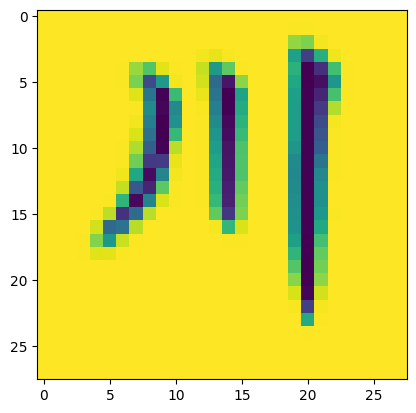

[0. 1. 0. 0.]


In [59]:
#we will see a single image in out dataset
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()
print(y_train[4])

In [6]:
#Now defining some parameters for our model

In [60]:
num_classes = 4
#as we have 10 classes (0-9)
#we need to prdeict one out of 10 which has high probability
epochs = 30
img_rows = 28
img_cols = 28
#as each image is 28 by 28 pixel

In [64]:
#build our model
#BY DEFAULT STRIDE IS 1
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(4, activation='softmax'))

In [11]:
#compile our model

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 batch_normalization_15 (Ba  (None, 11, 11, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 batch_normalization_16 (Ba  (None, 6, 6, 32)         

In [68]:
#fit the model
model.fit(x_train,y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1/1 [==============================] - 0s 136ms/step - loss: 0.1177 - accuracy: 0.9688 - val_loss: 1.4360 - val_accuracy: 0.2500
Epoch 2/50
1/1 [==============================] - 0s 68ms/step - loss: 0.0643 - accuracy: 1.0000 - val_loss: 1.4379 - val_accuracy: 0.2500
Epoch 3/50
1/1 [==============================] - 0s 104ms/step - loss: 0.1029 - accuracy: 0.9375 - val_loss: 1.4404 - val_accuracy: 0.2500
Epoch 4/50
1/1 [==============================] - 0s 71ms/step - loss: 0.1111 - accuracy: 0.9375 - val_loss: 1.4427 - val_accuracy: 0.2500
Epoch 5/50
1/1 [==============================] - 0s 79ms/step - loss: 0.0913 - accuracy: 0.9688 - val_loss: 1.4447 - val_accuracy: 0.2500
Epoch 6/50
1/1 [==============================] - 0s 84ms/step - loss: 0.0407 - accuracy: 1.0000 - val_loss: 1.4470 - val_accuracy: 0.2500
Epoch 7/50
1/1 [==============================] - 0s 80ms/step - loss: 0.0734 - accuracy: 0.9688 - val_loss: 1.4484 - val_accuracy: 0.1250
Epoch 8/50
1/1 [=========

In [69]:
score ,acc = model.evaluate(x_test,y_test)
print("Score is :",score)
print("Accuracy :",acc)


1/1 [==============================] - 0s 24ms/step - loss: 1.6392 - accuracy: 0.2500
Score is : 1.6392161846160889
Accuracy : 0.25


In [ ]:
#save our model

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("models.h5")

In [ ]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model,'/home/ubuntu/love/keras')